In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lena-bmp/lenna.bmp


In [2]:
# 영상의 그레이 그레이 스케일 평균값을 이용한 명암비(contrast) 조절

import cv2
import numpy as np # linear algebra

img = cv2.imread('/kaggle/input/lena-bmp/lenna.bmp', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32)

gray_avg = np.mean(img)
gray_avg = 128

r, c = img.shape
a = 1.5

#new_img = np.empty_like(img)

#for col in range(0, c):
    #for row in range(0, r):
new_img = img + (img - gray_avg) * a

new_img = np.where(new_img > 255, 255, new_img)
new_img = np.where(new_img < 0, 0, new_img)
new_img = new_img.astype(np.float32)

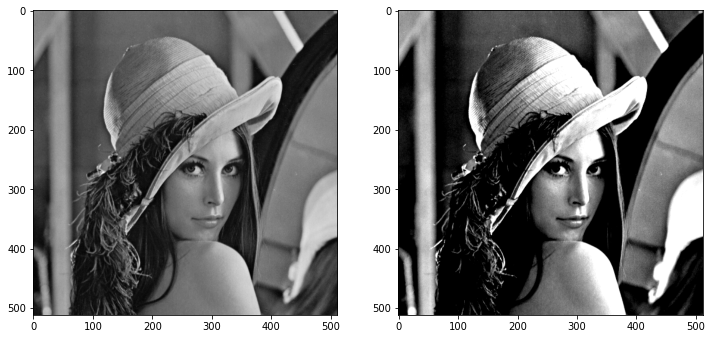

In [3]:
import matplotlib.pyplot as plt

#plt.subplot(nrows, ncols, index)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_img, cmap='gray')
plt.show()

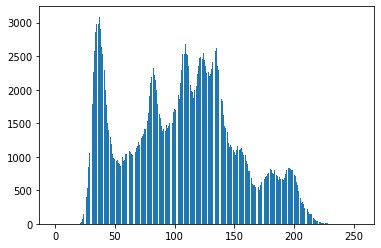

In [4]:
# 히스토그램 직접 그리기

img = cv2.imread('/kaggle/input/lena-bmp/lenna.bmp', cv2.IMREAD_GRAYSCALE)

hist = np.zeros((255,), dtype=np.int32)

r, c = img.shape
for row in range(0, r):
    for col in range(0, c):
        hist[img[row][col]] += 1

plt.bar(range(len(hist)), hist)
plt.show()

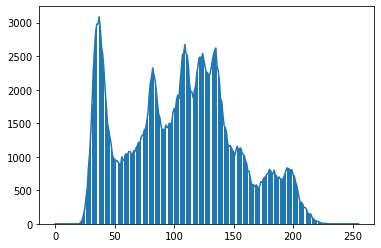

In [5]:
# opencv를 이용하여 히스토그램 그리기

img = cv2.imread('/kaggle/input/lena-bmp/lenna.bmp', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

hist_f = hist.flatten()
plt.bar(range(len(hist_f)), hist_f)

#선형 그래프 함께 그리기
plt.plot(hist)
plt.show()